## Notebook to try to interpolate the CCI SST analysis

In [1]:
import sys
import xarray as xr
import glob
import dask
# note: need to pip install Pydap
#from pydap.client import open_url

In [2]:
import matplotlib.pyplot as plt
import cmocean

In [3]:
import time

In [31]:
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# this is my local path to the data
# files = glob.glob('/Volumes/starly/sst/CCI/L4/**/**/*CDR2.1-v02.0-fv01.0.nc',recursive=True)

# try using OpenDAP access instead
#dataset = open_url('http://test.opendap.org/dap/data/nc/coads_climatology.nc')
# not sure if it is http or https? 
#dataset = open_url('http://dap.ceda.ac.uk/neodc/esacci/sst/data/CDR_v2/Analysis/L4/v2.1/1981/09/01/19810901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.1-v02.0-fv01.0.nc')
#ds = xr.open_dataset('http://dap.ceda.ac.uk/neodc/esacci/sst/data/CDR_v2/Analysis/L4/v2.1/1981/09/01/19810901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.1-v02.0-fv01.0.nc')
# from https://surftemp.github.io/sst-data-tutorials/tutorial1.html
# see https://registry.opendata.aws/surftemp-sst/
ds = xr.open_zarr('https://surftemp-sst.s3.us-west-2.amazonaws.com/data/sst.zarr')

In [5]:
ds

,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [6]:
display(ds.time[0]);display(ds.time[-1])

<xarray.DataArray 'time' ()>
array('1981-09-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1981-09-01T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    comment:        
    long_name:      reference time of sst field
    standard_name:  time

<xarray.DataArray 'time' ()>
array('2020-12-31T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-12-31T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    comment:        
    long_name:      reference time of sst field
    standard_name:  time

In [8]:
drifter_file_path = '../data/process/gdp_v2.00.nc'
dr = xr.open_dataset(drifter_file_path,chunks={})
dr

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    longitude              (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    latitude               (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    time                   (obs) datetime64[ns] dask.array<chunksize=(165754333,), meta=np.ndarray>
    ids                    (obs) int64 dask.array<chunksize=(165754333,), meta=np.ndarray>
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    location_type          (traj) bool dask.array<chunksize=(17324,), meta=np.ndarray>
    WMO                    (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    expno                  (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_date            (traj) datetime64[ns] dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_lon             (traj) float32 dask.array<chunksize=(17324,), meta=np.ndarray>
    ...                     ...
    err_sst                (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    err_sst1               (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    err_sst2               (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    flg_sst                (obs) int8 dask.array<chunksize=(165754333,), meta=np.ndarray>
    flg_sst1               (obs) int8 dask.array<chunksize=(165754333,), meta=np.ndarray>
    flg_sst2               (obs) int8 dask.array<chunksize=(165754333,), meta=np.ndarray>
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-03-26T12:01:44.602178
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [11]:
traj_idx = np.insert(np.cumsum(dr.rowsize.values), 0, 0)

In [15]:
i = 10
dr.sst[slice(traj_idx[i], traj_idx[i+1])].compute()

<xarray.DataArray 'sst' (obs: 2253)>
array([294.827, 294.813, 294.809, ..., 301.638, 301.528, 301.398],
      dtype=float32)
Coordinates:
    longitude  (obs) float32 -55.59 -55.6 -55.6 -55.6 ... -59.2 -59.2 -59.2
    latitude   (obs) float32 35.35 35.35 35.34 35.34 ... 34.41 34.4 34.39 34.38
    time       (obs) datetime64[ns] 2012-05-31T03:00:00 ... 2012-09-01T23:00:00
    ids        (obs) int64 101517 101517 101517 101517 ... 101517 101517 101517
Dimensions without coordinates: obs
Attributes:
    long_name:  Fitted sea water temperature
    units:      Kelvin
    comments:   Estimated near-surface sea water temperature from drifting bu...

In [40]:
len(traj_idx)
# 1 + number of trajectory

17325

In [130]:
i = 15000
sli = slice(traj_idx[i], traj_idx[i+1])
sli

slice(147417061, 147433308, None)

In [131]:
t0 = time.time()
dsi = ds.interp(lon=dr.longitude[sli],lat=dr.latitude[sli],
                time=dr.time[sli])
t1 = time.time()-t0
display(t1)

0.507378101348877

In [132]:
# does this retain the result in memory
t0 = time.time()
dsi.analysed_sst.data.compute()
t1 = time.time()-t0
display(t1)

29.745841026306152

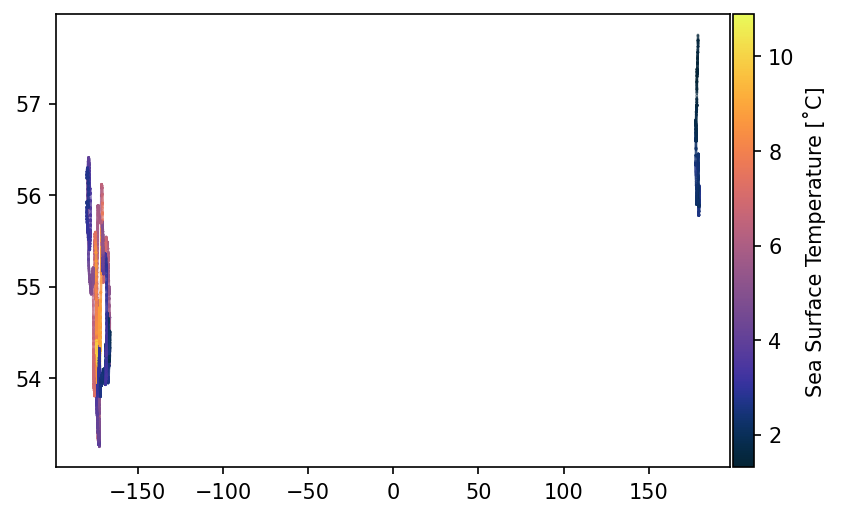

In [133]:
# does this redo the interpolation?
fig = plt.figure(dpi=150)
ax = fig.add_subplot()
pcm = ax.scatter(dr.longitude[sli],dr.latitude[sli],s=0.05,c=dsi.analysed_sst.data-273.15,cmap=cmocean.cm.thermal)
# what does this all do?
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='3%', pad=0.02, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax)
cb.set_label('Sea Surface Temperature [˚C]')


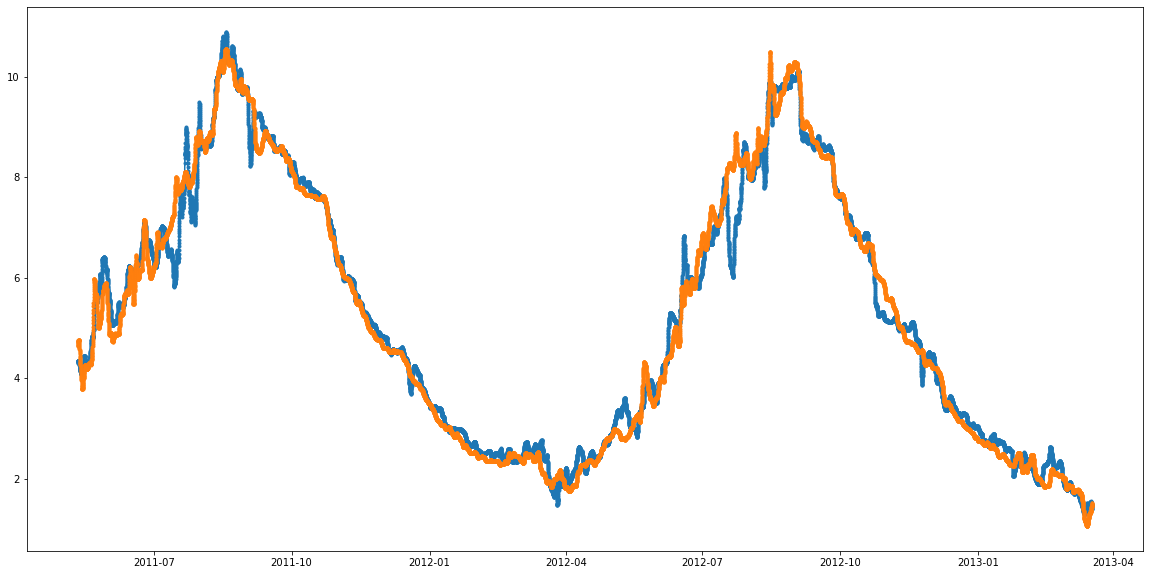

In [134]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
c1 = plt.plot(dr.time[sli],dsi.analysed_sst.data-273.15,marker='.')
c2 = plt.plot(dr.time[sli],dr.sst1[sli]-273.15,marker='.')

In [135]:
# this technically work
#t0 = time.time()
#dsi = ds.interp(lon=dr.longitude,lat=dr.latitude,time=dr.time)
#t1 = time.time()-t0
#display(t1)

In [136]:
dsi

<xarray.Dataset>
Dimensions:                   (obs: 16247, bnds: 2)
Coordinates:
    lon                       (obs) float32 -166.5 -166.5 -166.5 ... 179.0 178.9
    lat                       (obs) float32 54.2 54.21 54.22 ... 57.74 57.75
    time                      (obs) datetime64[ns] dask.array<chunksize=(16247,), meta=np.ndarray>
    longitude                 (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    latitude                  (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    ids                       (obs) int64 dask.array<chunksize=(16247,), meta=np.ndarray>
Dimensions without coordinates: obs, bnds
Data variables:
    analysed_sst              (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    analysed_sst_uncertainty  (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    lat_bnds                  (obs, bnds) float32 dask.array<chunksize=(16247, 2), meta=np.ndarray>
    lon_bnds                  (obs, bnds) float32 dask.array<chunksize=(16247, 2), meta=np.ndarray>
    mask                      (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
    sea_ice_fraction          (obs) float32 dask.array<chunksize=(16247,), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                     CF-1.5, Unidata Observation Dataset v1.0
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  Funded by the Copernicus Climate Change ...
    cdm_data_type:                   grid
    comment:                         These data were produced by the Met Offi...
    contact:                         http://copernicus-support.ecmwf.int
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             20201215T000000Z
    title:                           C3S SST L4 product
    tracking_id:                     7fdf2639-26e5-4d4f-a60e-0bcfc9744204
    uuid:                            7fdf2639-26e5-4d4f-a60e-0bcfc9744204
    westernmost_longitude:           -180.0

In [137]:
# but this will blow up my memory ... so can we loop over trajectories?
#dsi.to_netcdf('cci_sst.v2.00.nc')

In [138]:
rowsize = dr.rowsize.values

In [139]:
# so redo with chunks aligned?
chunk_settings = {'obs': tuple(rowsize.tolist())}
dr = xr.open_dataset(drifter_file_path, chunks=chunk_settings)

In [140]:
dr

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    longitude              (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    latitude               (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    time                   (obs) datetime64[ns] dask.array<chunksize=(417,), meta=np.ndarray>
    ids                    (obs) int64 dask.array<chunksize=(417,), meta=np.ndarray>
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 dask.array<chunksize=(17324,), meta=np.ndarray>
    location_type          (traj) bool dask.array<chunksize=(17324,), meta=np.ndarray>
    WMO                    (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    expno                  (traj) int32 dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_date            (traj) datetime64[ns] dask.array<chunksize=(17324,), meta=np.ndarray>
    deploy_lon             (traj) float32 dask.array<chunksize=(17324,), meta=np.ndarray>
    ...                     ...
    err_sst                (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    err_sst1               (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    err_sst2               (obs) float32 dask.array<chunksize=(417,), meta=np.ndarray>
    flg_sst                (obs) int8 dask.array<chunksize=(417,), meta=np.ndarray>
    flg_sst1               (obs) int8 dask.array<chunksize=(417,), meta=np.ndarray>
    flg_sst2               (obs) int8 dask.array<chunksize=(417,), meta=np.ndarray>
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-03-26T12:01:44.602178
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [169]:
#create an xarray dataset or dataarray first?
#dsi = np.zeros(len(dr.longitude))
dsi = xr.Dataset(data_vars=dict(
                        analysed_sst = np.nan*dr.sst,
                        analysed_sst_uncertainty = np.nan*dr.sst
                    ),
                 coords=dict(
                     longitude=dr.longitude,
                     latitude=dr.latitude,
                     time=dr.time)
                )

In [170]:
dsi.analysed_sst[0:10].data.compute()

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [193]:
t0 = time.time()
for i in range(0,11):
    sli = slice(traj_idx[i], traj_idx[i+1])
    # I think the interpolation interpolate all fields? why not the mask?
    dsi_tmp = ds.interp(lon=dr.longitude[sli],lat=dr.latitude[sli],
        time=dr.time[sli],method="linear")
    dsi.analysed_sst[sli] = dsi_tmp['analysed_sst']
    dsi.analysed_sst_uncertainty[sli] = dsi_tmp['analysed_sst_uncertainty']
    display(i)
t1 = time.time()-t0
display(t1)

0

1

2

3

4

5

6

7

8

9

10

4.477936029434204

In [172]:
dsi.analysed_sst_uncertainty[0:10].data.compute()

array([0.5883731 , 0.5889017 , 0.58928   , 0.58916664, 0.5883333 ,
       0.5875    , 0.58697736, 0.5863359 , 0.5857912 , 0.58519447],
      dtype=float32)

In [173]:
dr.sst[0:10].data.compute()

array([293.884, 293.809, 293.757, 293.725, 293.698, 293.664, 293.615,
       293.552, 293.484, 293.425], dtype=float32)

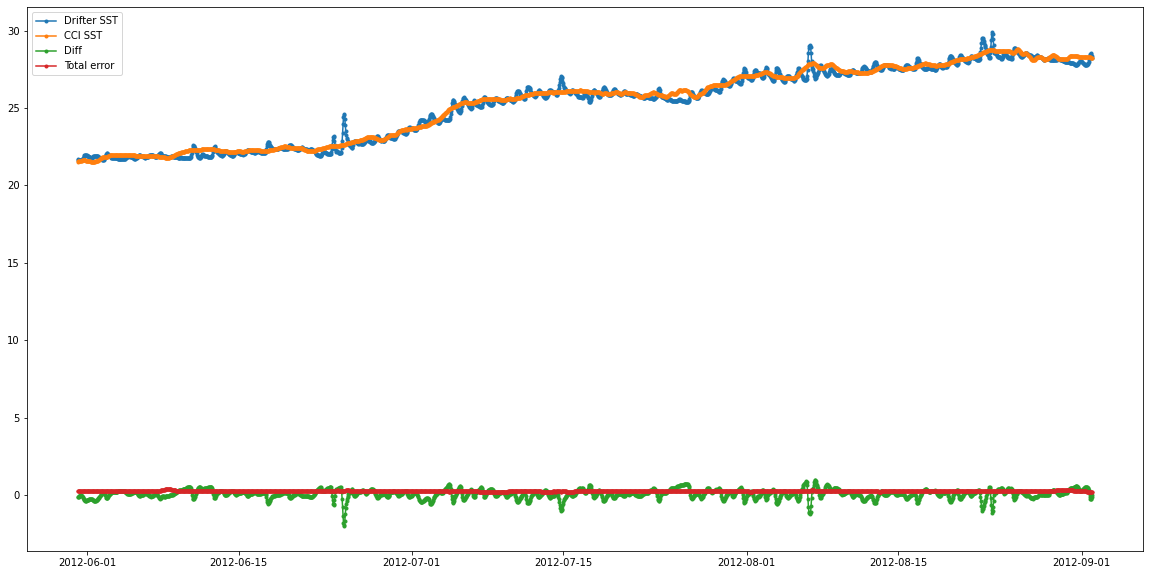

In [190]:
i = 10
sli = slice(traj_idx[i], traj_idx[i+1])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
c1 = plt.plot(dr.time[sli],dr.sst[sli]-273.15,marker='.',label='Drifter SST')
c2 = plt.plot(dsi.time[sli],dsi.analysed_sst[sli]-273.15,marker='.',label='CCI SST')
c3 = plt.plot(dsi.time[sli],dsi.analysed_sst[sli]-dr.sst[sli],marker='.',label='Diff')
c4 = plt.plot(dsi.time[sli],np.sqrt(dsi.analysed_sst_uncertainty[sli]**2+dr.err_sst[sli]**2),marker='.',label='Total error')
#ax.legend([c1,c2,c3,c4],['Drifter SST','CCI SST','Diff','Total error'])
ax.legend()

In [117]:
dr.sst[sli].values

array([293.01392, 292.95993, 292.92023, ..., 299.80774, 299.7923 ,
       299.78   ], dtype=float32)

In [118]:
ds

,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [127]:
range(0,10)

range(0, 10)

In [129]:
for i in range(0,10):
    display(slice(traj_idx[i], traj_idx[i+1]))

slice(0, 417, None)

slice(417, 2422, None)

slice(2422, 4392, None)

slice(4392, 5699, None)

slice(5699, 10345, None)

slice(10345, 11686, None)

slice(11686, 16121, None)

slice(16121, 17802, None)

slice(17802, 35540, None)

slice(35540, 38298, None)

In [142]:
np.nan*1

nan

In [191]:
dsi.to_netcdf('../data/process/gdp_cci_sst_v2.00.nc')